#Importing libraries and cleaned_df_Eg dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cbm_vbm_new.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Cs,FA,MA,Pb,Sn,I,Br,BG,CBM,VBM
0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.564,-3.9,-5.45
1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.709,-3.6,-5.40


#Heatmap

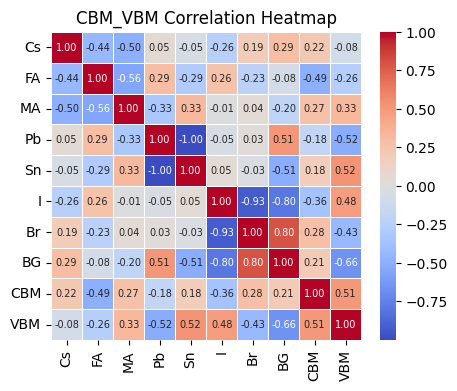

In [ ]:
df1=df.iloc[:,0:]
corr_matrix = df1.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(5, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,  annot_kws={"size": 7})
plt.title('CBM_VBM Correlation Heatmap')
plt.savefig('CBM_VBM Correlation Heatmap.png')
plt.show()

#Data Prep

In [ ]:
dfx=df.iloc[:,:-2]
X=dfx.values
y=df.iloc[:,-1].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br,BG
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0,1.564
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0,1.709
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.877
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0,2.328
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0,1.255
...,...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0,1.285
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0,1.307
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.877
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0,1.419


#Ensemble Learning

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=100)
rf=RandomForestRegressor()
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 0.1880
Standard Deviation: 0.0350


In [ ]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value1)
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R value: 0.8186663003689731
MSE on Test Set: 0.017264123435000694
RMSE on Test Set: 0.13139301136286013


In [ ]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p1)
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R value: 0.9488168800660461
MSE on Train Set: 0.010449191560109608
RMSE on Train Set: 0.10222128721606673


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[-5.15 -4.88]
 [-5.45 -5.6 ]
 [-5.08 -5.08]
 [-5.57 -5.6 ]
 [-5.57 -5.62]
 [-5.63 -5.4 ]
 [-5.7  -5.75]
 [-5.65 -5.67]
 [-5.51 -5.45]
 [-5.57 -5.5 ]
 [-5.37 -5.4 ]
 [-5.36 -5.4 ]
 [-5.49 -5.8 ]
 [-5.54 -5.4 ]
 [-5.49 -5.46]
 [-5.53 -5.57]
 [-5.59 -5.7 ]]


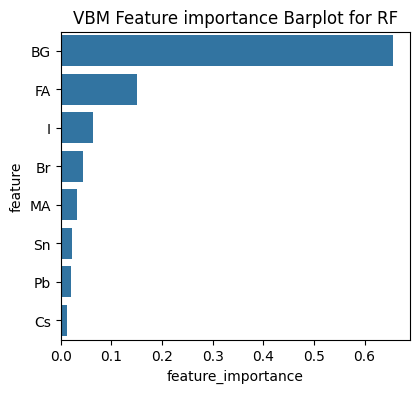

In [ ]:
feature_importance = rf.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('VBM Feature importance Barplot for RF')
plt.savefig('VBM Feature importance Barplot for RF.png')

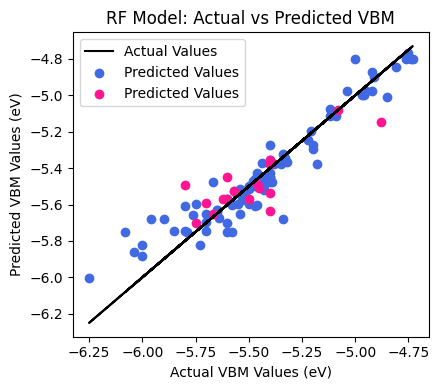

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Predicted Values')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('RF Model: Actual vs Predicted VBM')
plt.savefig('RF Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=100)
gbr=GradientBoostingRegressor()
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.1997
Standard Deviation: 0.0431


In [ ]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value2)
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R value: 0.8371403963160703
MSE on Test Set: 0.01624553066411812
RMSE on Test Set: 0.12745795645670033


In [ ]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p2)
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R value: 0.9599368921513086
MSE on Train Set: 0.008041889951420148
RMSE on Train Set: 0.08967658530196244


In [ ]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[-5.01 -4.88]
 [-5.44 -5.6 ]
 [-5.02 -5.08]
 [-5.6  -5.6 ]
 [-5.58 -5.62]
 [-5.56 -5.4 ]
 [-5.62 -5.75]
 [-5.56 -5.67]
 [-5.43 -5.45]
 [-5.6  -5.5 ]
 [-5.38 -5.4 ]
 [-5.39 -5.4 ]
 [-5.48 -5.8 ]
 [-5.59 -5.4 ]
 [-5.43 -5.46]
 [-5.49 -5.57]
 [-5.58 -5.7 ]]


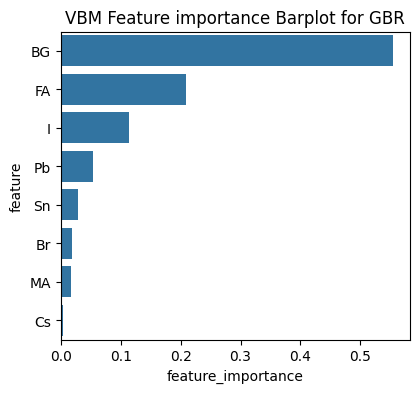

In [ ]:
feature_importance = gbr.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('VBM Feature importance Barplot for GBR')
plt.savefig('VBM Feature importance Barplot for GBR.png')

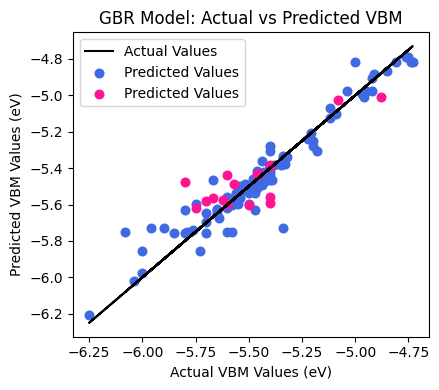

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Predicted Values')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Predicted Values')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted VBM')
plt.savefig('GBR Model: Actual vs Predicted VBM.png')

plt.tight_layout()
plt.show()

##XGBoost

In [ ]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=100)
xgb = xgb.XGBRegressor()
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 0.2082
Standard Deviation: 0.0468


In [ ]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value3)
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R value: 0.05477315863799848
RMSE on Test Set: 0.24749931261753358


In [ ]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p3)
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R value: 0.9633806620303234
MSE on Train Set: 0.00732631231192378
RMSE on Train Set: 0.08559388010788961


In [ ]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[-5.71 -4.88]
 [-5.4  -5.6 ]
 [-5.2  -5.08]
 [-5.54 -5.6 ]
 [-5.57 -5.62]
 [-5.51 -5.4 ]
 [-5.6  -5.75]
 [-5.54 -5.67]
 [-5.42 -5.45]
 [-5.65 -5.5 ]
 [-5.37 -5.4 ]
 [-5.4  -5.4 ]
 [-5.43 -5.8 ]
 [-5.52 -5.4 ]
 [-5.5  -5.46]
 [-5.51 -5.57]
 [-5.46 -5.7 ]]


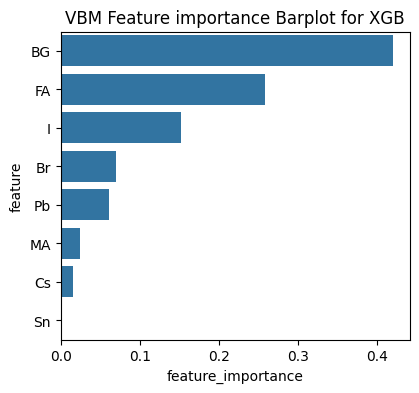

In [ ]:
feature_importance = xgb.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('VBM Feature importance Barplot for XGB')
plt.savefig('VBM Feature importance Barplot for XGB.png')

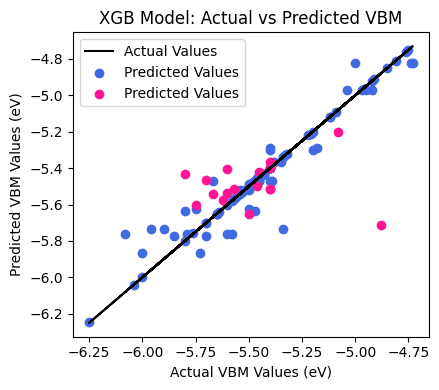

In [ ]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Predicted Values')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('XGB Model: Actual vs Predicted VBM')
plt.savefig('XGB Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

##CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
catboost = CatBoostRegressor()
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.2648514	total: 3.72ms	remaining: 528ms
7:	learn: 0.2621202	total: 4.24ms	remaining: 526ms
8:	learn: 0.2590223	total: 4.82ms	remaining: 530ms
9:	learn: 0.2559193	total: 5.47ms	remaining: 542ms
10:	learn: 0.2531520	total: 6.08ms	remaining: 546ms
11:	learn: 0.2500556	total: 6.69ms	remaining: 551ms
12:	learn: 0.2472603	total: 7.35ms	remaining: 558ms
13:	learn: 0.2446333	total: 7.9ms	remaining: 557ms
14:	learn: 0.2417802	total: 8.49ms	remaining: 557ms
15:	learn: 0.2394657	total: 9.07ms	remaining: 558ms
16:	learn: 0.2370699	total: 9.84ms	remaining: 569ms
17:	learn: 0.2345124	total: 10.4ms	remaining: 566ms
18:	learn: 0.2319109	total: 11ms	remaining: 570ms
19:	learn: 0.2295532	total: 11.6ms	remaining: 570ms
20:	learn: 0.2273566	total: 12.4ms	remaining: 577ms
21:	learn: 0.2255870	total: 13ms	remaining: 576ms
22:	learn: 0.2234291	total: 13.6ms	remaining: 577ms
23:	learn: 0.2215905	total: 14.3ms	remaining: 582ms
24:	learn: 0.2196070	t

In [ ]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value4)
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R value: 0.7972587704582801
MSE on Test Set: 0.020464714159030756
RMSE on Test Set: 0.14305493406041875


In [ ]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R value:", r_value_p4)
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R value: 0.9617797178142825
MSE on Train Set: 0.007659080844458311
RMSE on Train Set: 0.08751617475905989


In [ ]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[-5.01 -4.88]
 [-5.42 -5.6 ]
 [-5.32 -5.08]
 [-5.61 -5.6 ]
 [-5.5  -5.62]
 [-5.51 -5.4 ]
 [-5.61 -5.75]
 [-5.55 -5.67]
 [-5.4  -5.45]
 [-5.58 -5.5 ]
 [-5.38 -5.4 ]
 [-5.39 -5.4 ]
 [-5.46 -5.8 ]
 [-5.58 -5.4 ]
 [-5.5  -5.46]
 [-5.52 -5.57]
 [-5.56 -5.7 ]]


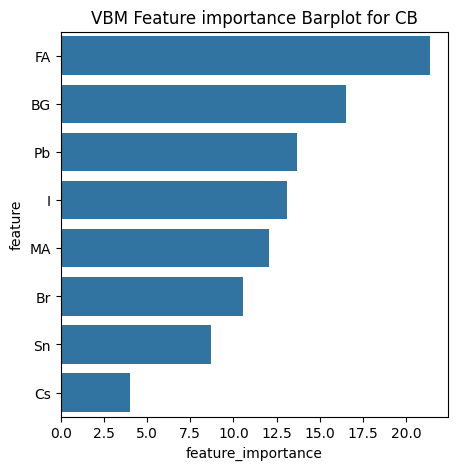

In [ ]:
feature_importance = catboost.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(5, 5))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('VBM Feature importance Barplot for CB')
plt.savefig('VBM Feature importance Barplot for CB.png')
plt.show()


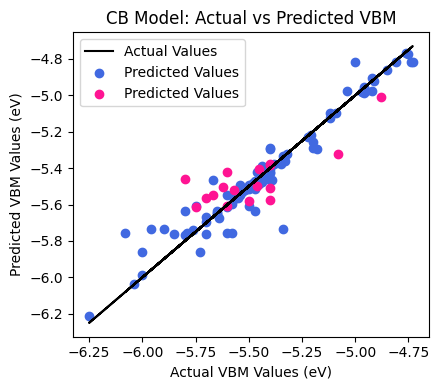

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Predicted Values')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Predicted Values')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('CB Model: Actual vs Predicted VBM')
plt.savefig('CB Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

#Hyperparameter tuning using Optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.6 MB/s eta 0:00:00


##Tuning of RF

In [ ]:
import optuna
def objective1(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train1, y_train1, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse

# Create the Optuna study and optimize the objective function
study1 = optuna.create_study(direction='minimize')
study1.optimize(objective1, n_trials=100)

[I 2024-09-09 13:55:43,494] A new study created in memory with name: no-name-7f0c80c7-4703-4911-a146-36da76a8ec2a
[I 2024-09-09 13:55:47,096] Trial 0 finished with value: 0.26743338466125277 and parameters: {'n_estimators': 331, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': None}. Best is trial 0 with value: 0.26743338466125277.
[I 2024-09-09 13:55:52,355] Trial 1 finished with value: 0.24865817141090804 and parameters: {'n_estimators': 916, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.24865817141090804.
[I 2024-09-09 13:55:59,067] Trial 2 finished with value: 0.24911381516938855 and parameters: {'n_estimators': 864, 'max_depth': 27, 'min_samples_split': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.24865817141090804.
[I 2024-09-09 13:56:08,492] Trial 3 finished with value: 0.23549056139256008 and parameters: {'n_estimators': 993, 'max_depth

In [ ]:
# Print the best hyperparameters and the best score
print('Best trial:', study1.best_trial.number)
print("Best hyperparameters: ", study1.best_params)
print("Best RMSE: ", study1.best_value)

Best trial: 63
Best hyperparameters:  {'n_estimators': 1216, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}
Best RMSE:  0.18575460204158212


In [ ]:
# Train the model with the best hyperparameters
rf_params = {'n_estimators': 1216,
             'max_depth': 31,
             'min_samples_split': 3,
             'min_samples_leaf': 1,
             'max_features': None
}

# Initialize the Random Forest model with the defined hyperparameters
best_rf = RandomForestRegressor(**rf_params, random_state=100)
# Calculate cross-validated RMSE
mse_scores_c1 = cross_val_score(estimator=best_rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c1 = np.sqrt(-mse_scores_c1)
print("RMSE: {:.4f}".format(rmse_scores_c1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c1.std()))

RMSE: 0.1825
Standard Deviation: 0.0346


In [ ]:
best_rf.fit(X_train1,y_train1)

y_pred_n1=best_rf.predict(X_test1)
y_pred_n1=y_pred1.reshape(len(y_pred1),1)
r_value_n1 = np.corrcoef(y_test1.squeeze(), y_pred_n1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred_n1))
print("R value:", r_value_n1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred_n1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred_n1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred_n1)))

R2 on Test Set: 0.6598213875749855
R value: 0.8186663003689731
MAE on Test Set: 0.09531178338001937
MSE on Test Set: 0.017264123435000694
RMSE on Test Set: 0.13139301136286013


In [ ]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.8974544461983247
R value: 0.9488168800660461
MAE on Train Set: 0.07142378264208868
MSE on Train Set: 0.010449191560109608
RMSE on Train Set: 0.10222128721606673


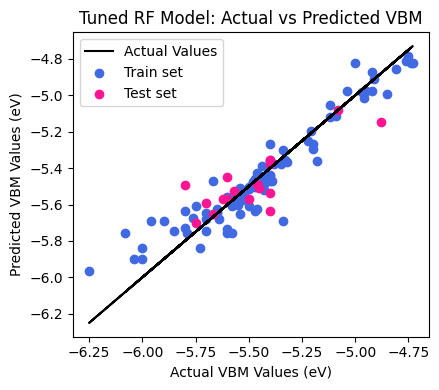

In [ ]:
y_train_pred_n1=best_rf.predict(X_train1)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred_n1, color='royalblue', label='Train set')
plt.scatter(y_test1, y_pred_n1, color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned RF Model: Actual vs Predicted VBM')
plt.savefig('Tuned RF Model: Actual vs Predicted VBM.png')
plt.tight_layout()
plt.show()

##Tuning for Gradient Boosting

In [ ]:
import optuna
def objective2(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Create the Gradient Boosting model
    model = GradientBoostingRegressor(**params, random_state=100)

    # Perform cross-validation
    score = cross_val_score(model, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize
study2 = optuna.create_study(direction='minimize')
study2.optimize(objective2, n_trials=100)

[I 2024-09-08 17:24:36,362] A new study created in memory with name: no-name-127fbe15-6480-4623-9b86-e06c26a27676
[I 2024-09-08 17:24:38,749] Trial 0 finished with value: 0.2098969018327246 and parameters: {'n_estimators': 697, 'max_depth': 7, 'learning_rate': 0.04323226445599431, 'subsample': 0.8610255490036494, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.2098969018327246.
[I 2024-09-08 17:24:40,786] Trial 1 finished with value: 0.21624120802740618 and parameters: {'n_estimators': 731, 'max_depth': 8, 'learning_rate': 0.2743447873839219, 'subsample': 0.6064090373498633, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.2098969018327246.
[I 2024-09-08 17:24:42,048] Trial 2 finished with value: 0.18617155369577504 and parameters: {'n_estimators': 319, 'max_depth': 7, 'learning_rate': 0.05530617344989796, 'subsample': 0.9988462912501357, 'min_samples_split': 5, 'min_samples_leaf':

In [ ]:
# Print the best hyperparameters and the best score
print('Best trial:', study2.best_trial.number)
print("Best hyperparameters: ", study2.best_params)
print("Best RMSE: ", study2.best_value)
#'n_estimators': 379, 'max_depth': 3, 'learning_rate': 0.010427994628969544, 'subsample': 0.5166543663156911, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None

Best trial: 81
Best hyperparameters:  {'n_estimators': 869, 'max_depth': 9, 'learning_rate': 0.07716942960456094, 'subsample': 0.5580155443705417, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}
Best RMSE:  0.17683023166494044


In [ ]:
# Train the final model with the best hyperparameters
best_gbr = GradientBoostingRegressor(n_estimators= 379, max_depth= 3, learning_rate=0.010427994628969544,
                                  subsample= 0.5166543663156911, min_samples_split= 2,
                                     min_samples_leaf=1, max_features=None, random_state=100)
best_gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores_c2 = cross_val_score(estimator=best_gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c2 = np.sqrt(-mse_scores_c2)
print("RMSE: {:.4f}".format(rmse_scores_c2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c2.std()))

RMSE: 0.1844
Standard Deviation: 0.0392


In [ ]:
#TEST set
y_pred_n2=best_gbr.predict(X_test2)
y_pred_n2=y_pred_n2.reshape(len(y_pred_n2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred_n2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred_n2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred_n2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred_n2)))

R2 on Test Set: 0.7150467598722563
R value: 0.8599372548757905
MAE on Test Set: 0.09136698966000853
MSE on Test Set: 0.014461426236351526
RMSE on Test Set: 0.12025567028773124


In [ ]:
#GBR on Train set
y_train_pred_n2 = best_gbr.predict(X_train2)

y_train_pred_n2=y_train_pred_n2.reshape(len(y_train_pred_n2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train2, y_train_pred_n2))
print("R value:", r_value_p2)
print("MAE on Train Set:", mean_absolute_error(y_train2, y_train_pred_n2))
print("MSE on Train Set:", mean_squared_error(y_train2, y_train_pred_n2))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred_n2)))

R2 on Train Set: 0.875300120990236
R value: 0.9383455661400077
MAE on Train Set: 0.08580618201552342
MSE on Train Set: 0.012706674009636367
RMSE on Train Set: 0.1127238839360868


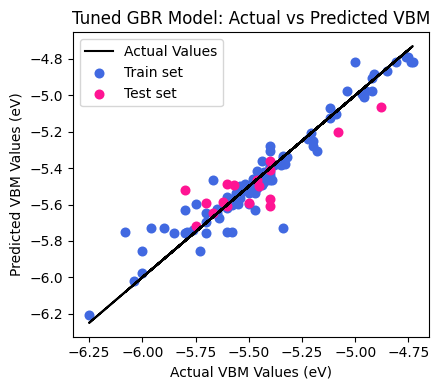

In [ ]:
#Plot
y_train_pred_n2=best_gbr.predict(X_train2)

# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred_n2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned GBR Model: Actual vs Predicted VBM')
plt.savefig('Tuned GBR Model: Actual vs Predicted VBM.png')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()

##Tuning of XGBoost

In [ ]:
from xgboost import XGBRegressor
def objective3(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5)
    }

    # Create the XGBoost model
    model = XGBRegressor(**params, random_state=100, use_label_encoder=False, eval_metric='rmse')

    # Perform cross-validation
    score = cross_val_score(model, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
study3 = optuna.create_study(direction='minimize')
study3.optimize(objective3, n_trials=100)

[I 2024-08-02 05:34:59,457] A new study created in memory with name: no-name-66a3ddf7-3a68-46e7-ae3a-585402bc78d7
[I 2024-08-02 05:34:59,826] Trial 0 finished with value: 0.21844328767316384 and parameters: {'n_estimators': 561, 'max_depth': 10, 'learning_rate': 0.1474808550130584, 'subsample': 0.8344830098005559, 'min_child_weight': 7, 'colsample_bytree': 0.7107721489996697, 'gamma': 0.3669393492056064}. Best is trial 0 with value: 0.21844328767316384.
[I 2024-08-02 05:35:00,326] Trial 1 finished with value: 0.2162339749006814 and parameters: {'n_estimators': 912, 'max_depth': 3, 'learning_rate': 0.2139290226221496, 'subsample': 0.7778181087818654, 'min_child_weight': 8, 'colsample_bytree': 0.6420133496080824, 'gamma': 0.3519665890738446}. Best is trial 1 with value: 0.2162339749006814.
[I 2024-08-02 05:35:00,593] Trial 2 finished with value: 0.21109611351461474 and parameters: {'n_estimators': 381, 'max_depth': 9, 'learning_rate': 0.1504148755241191, 'subsample': 0.8850762427663188, 

In [ ]:
# Print the best hyperparameters and the corresponding R2 score
print(f'Best trial: {study3.best_trial.number}')
print(f'Best value (R2): {study3.best_trial.value}')
print(f'Best hyperparameters: {study3.best_trial.params}')

Best trial: 74
Best value (R2): 0.1645243353083524
Best hyperparameters: {'n_estimators': 811, 'max_depth': 7, 'learning_rate': 0.06865366238988868, 'subsample': 0.7677726851297251, 'min_child_weight': 2, 'colsample_bytree': 0.7011737569005778, 'gamma': 0.01176645233946828}


In [ ]:
from xgboost import XGBRegressor
xgb_params = {
  'n_estimators': 811, 'max_depth': 7, 'learning_rate': 0.06865366238988868,
  'subsample': 0.7677726851297251, 'min_child_weight': 2,
  'colsample_bytree': 0.7011737569005778, 'gamma': 0.01176645233946828
}
# Train the final model with the best hyperparameters
best_xgb = XGBRegressor(**xgb_params, random_state=100)
best_xgb.fit(X_train3, y_train3)

# Evaluating with cross-validation
mse_scores_n3 = cross_val_score(best_xgb, X_train3, y_train3, cv=5,  scoring='neg_mean_squared_error')
rmse_scores_n3 = np.sqrt(-mse_scores_n3)
print("RMSE: {:.4f}".format(rmse_scores_n3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_n3.std()))

RMSE: 0.1908
Standard Deviation: 0.0333


In [ ]:
y_pred_n3=best_xgb.predict(X_test3)
y_pred_n3=y_pred_n3.reshape(len(y_pred_n3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred_n3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred_n3))
print("MSE on Test Set:", mean_squared_error(y_test3, y_pred_n3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred_n3)))

R2 on Test Set: 0.5971549921272301
R value: 0.7932535166761696
MAE on Test Set: 0.10463722116806927
MSE on Test Set: 0.02044445384591121
RMSE on Test Set: 0.14298410347276794


In [ ]:
#XGB on Train set
y_train_pred_n3 = best_xgb.predict(X_train3)

y_train_pred_n3=y_train_pred_n3.reshape(len(y_train_pred_n3),1)
r_value_p3 = np.corrcoef(y_train4.squeeze(), y_train_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred_n3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred_n3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred_n3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred_n3)))

R2 on Train Set: 0.9150035635435715
R value: 0.9566055413163036
MAE on Train Set: 0.06028803651050853
MSE on Train Set: 0.00866097079330802
RMSE on Train Set: 0.09306433684988047


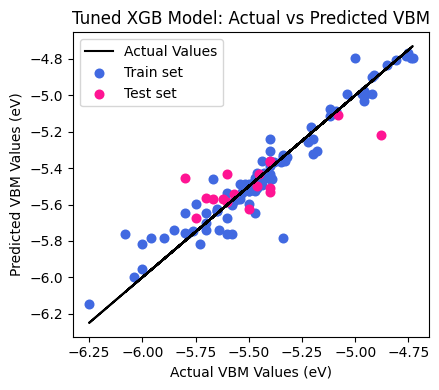

In [ ]:
y_train_pred_n3 = best_xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred_n3, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test3, y_pred_n3, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned XGB Model: Actual vs Predicted VBM')
plt.savefig('Tuned XGB Model: Actual vs Predicted VBM.png')

plt.tight_layout()
plt.show()

##Tuning of CatBoost

In [ ]:
import optuna
def objective4(trial):
    # Define the hyperparameters to be optimized
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    # Create the CatBoost model
    model = CatBoostRegressor(
        **params,
        logging_level='Silent',
        random_seed=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train4, y_train4, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize the objective function
study4 = optuna.create_study(direction='minimize')
study4.optimize(objective4, n_trials=100)

[I 2024-08-02 05:36:28,862] A new study created in memory with name: no-name-4b8f0b0d-ee88-4bab-a74b-9b6a7fa4f758
[I 2024-08-02 05:36:30,731] Trial 0 finished with value: 0.2345137390906047 and parameters: {'iterations': 737, 'depth': 9, 'learning_rate': 0.008935565656136549, 'l2_leaf_reg': 0.006517004676606473, 'bagging_temperature': 0.5982385473781466, 'random_strength': 9.59913103193778e-07, 'border_count': 2, 'od_type': 'Iter', 'od_wait': 22}. Best is trial 0 with value: 0.2345137390906047.
[I 2024-08-02 05:36:34,025] Trial 1 finished with value: 0.17273782782535146 and parameters: {'iterations': 767, 'depth': 8, 'learning_rate': 0.07094534680179466, 'l2_leaf_reg': 0.18305512477296376, 'bagging_temperature': 0.15364786919559215, 'random_strength': 0.00021231656863319597, 'border_count': 230, 'od_type': 'IncToDec', 'od_wait': 38}. Best is trial 1 with value: 0.17273782782535146.
[I 2024-08-02 05:36:36,280] Trial 2 finished with value: 0.17522283056843133 and parameters: {'iterations

In [ ]:
# Print the best hyperparameters and the best score
print(f'Best trial: {study4.best_trial.number}')
print("Best hyperparameters: ", study4.best_params)
print("Best RMSE: ", study4.best_value)

Best trial: 53
Best hyperparameters:  {'iterations': 336, 'depth': 5, 'learning_rate': 0.07604983650043505, 'l2_leaf_reg': 6.8369799054827505, 'bagging_temperature': 0.47183943803382805, 'random_strength': 0.4365556968400086, 'border_count': 157, 'od_type': 'IncToDec', 'od_wait': 30}
Best RMSE:  0.1568389008389272


In [ ]:
# Train the model with the best hyperparameters
best_cb = CatBoostRegressor(
    iterations=336,
    depth=5,
    learning_rate=0.07604983650043505,
    l2_leaf_reg=6.8369799054827505,
    bagging_temperature=0.47183943803382805,
    random_strength=0.4365556968400086,
    border_count=157,
    od_type='IncToDec',
    od_wait=30,
    random_seed=100
)
best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2805210	total: 381us	remaining: 128ms
1:	learn: 0.2734555	total: 1.35ms	remaining: 225ms
2:	learn: 0.2653948	total: 1.89ms	remaining: 209ms
3:	learn: 0.2578346	total: 2.39ms	remaining: 198ms
4:	learn: 0.2528065	total: 3.01ms	remaining: 199ms
5:	learn: 0.2458228	total: 3.71ms	remaining: 204ms
6:	learn: 0.2401365	total: 4.34ms	remaining: 204ms
7:	learn: 0.2360359	total: 4.96ms	remaining: 203ms
8:	learn: 0.2320468	total: 5.99ms	remaining: 218ms
9:	learn: 0.2271962	total: 6.49ms	remaining: 212ms
10:	learn: 0.2219904	total: 7.14ms	remaining: 211ms
11:	learn: 0.2178646	total: 7.67ms	remaining: 207ms
12:	learn: 0.2128458	total: 8.11ms	remaining: 201ms
13:	learn: 0.2090147	total: 8.61ms	remaining: 198ms
14:	learn: 0.2056755	total: 9.08ms	remaining: 194ms
15:	learn: 0.2021281	total: 9.59ms	remaining: 192ms
16:	learn: 0.1978235	total: 10.1ms	remaining: 190ms
17:	learn: 0.1949969	total: 10.6ms	remaining: 187ms
18:	learn: 0.1913544	total: 11.2ms	remaining: 186ms
19:	learn: 0.1877660	to

In [ ]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.6570580897068143
R value: 0.8433434432415802
MAE on Test Set: 0.10685393229665141
MSE on Test Set: 0.017404361279889594
RMSE on Test Set: 0.131925589935727


In [ ]:
#CB on Train set
y_train_pred_n4 = best_cb.predict(X_train4)

y_train_pred_n4=y_train_pred_n4.reshape(len(y_train_pred_n4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred_n4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred_n4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred_n4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred_n4)))

R2 on Train Set: 0.9069280307407376
R value: 0.9529552894362373
MAE on Train Set: 0.06915704074544082
MSE on Train Set: 0.009483851806462011
RMSE on Train Set: 0.09738506973074472


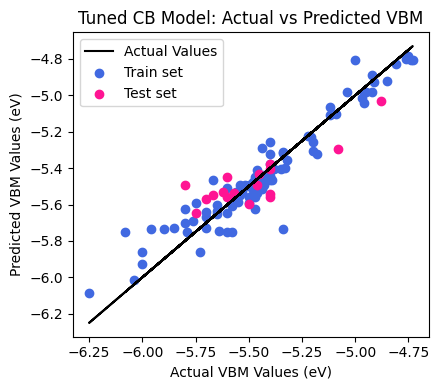

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred_n4, color='royalblue', label='Train set')
plt.scatter(y_test4, y_pred_n4, color='deeppink', label='Test set')

plt.xlabel('Actual VBM Values (eV)')
plt.ylabel('Predicted VBM Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned CB Model: Actual vs Predicted VBM')
plt.savefig('Tuned CB Model: Actual vs Predicted VBM.png')


plt.tight_layout()
plt.show()

#SHAP Analysis

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.5 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
dfx.shape

(110, 8)

In [ ]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X_train2, columns=col)

In [ ]:
explainer=shap.Explainer(best_gbr)
shap_values=explainer(dfx_test[0:300])

In [ ]:
np.shape(shap_values.values)

(93, 8)

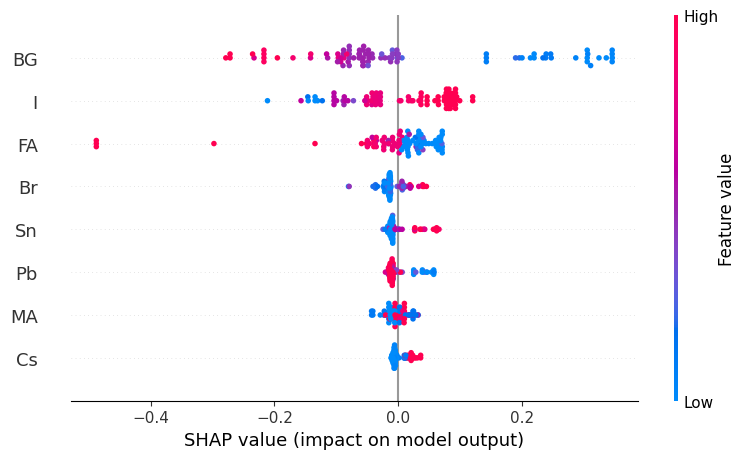

In [ ]:
plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values)
plt.show()

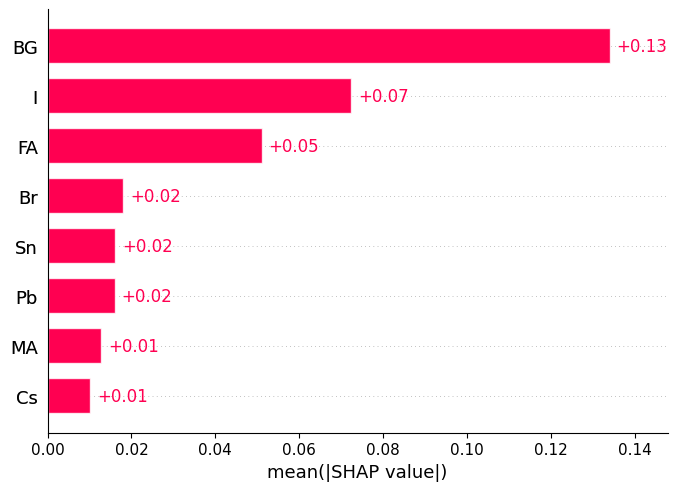

In [ ]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()